In [1]:
from sklearn.cluster import KMeans
import clusters as cl
from sklearn.datasets import make_blobs
import minisom
from minisom import MiniSom 
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

# this will reload modules that have changed
%load_ext autoreload
%autoreload 2

IndentationError: unexpected indent (clusters.py, line 147)

In [5]:
Ladata = cl.importData('data/mskcc/mskcc_clinical.csv', 'data/mskcc/mskcc_expr_fdr_1.csv')
darr = Ladata[0]
labels = Ladata[1]

In [6]:
k = cl.K(darr)
kmeans = KMeans(n_clusters=k)
kmeans.fit(darr)

KMeans(n_clusters=3)

In [7]:
#som = MiniSom(6, 6, 4, sigma=0.3, learning_rate=0.5) # initialization of 6x6 SOM
#som.train(darr, 100) # trains the SOM with 100 iterations
#som = MiniSom(300, 300, 2, sigma=0.3, learning_rate=0.3) # initialization of 6x6 SOM
## Initialization and training
n_neurons = 9
m_neurons = 9
som = MiniSom(n_neurons, m_neurons, darr.shape[1], sigma=2.5, learning_rate=.25, 
              neighborhood_function='gaussian', random_seed=0)

som.pca_weights_init(darr)
som.train(darr, 1000, verbose=True)  # random trainingsom.train(X, 1000) # trains the SOM with 100 iterations

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.276598501391816


In [8]:
#MAKE BMU LIST
somlist = []
for x in range(len(darr)):
    somlist.append(som.winner(darr[x]))
print(somlist)

[(0, 2), (1, 5), (0, 5), (0, 6), (0, 3), (1, 0), (0, 5), (0, 3), (0, 7), (1, 5), (0, 1), (1, 4), (0, 5), (0, 7), (0, 0), (1, 0), (0, 0), (0, 2), (1, 0), (1, 1), (1, 2), (1, 2), (0, 4), (1, 3), (1, 4), (1, 5), (1, 3), (0, 2), (0, 2), (1, 5), (1, 5), (1, 2), (0, 0), (0, 0), (1, 5), (0, 4), (0, 1), (0, 3), (0, 7), (0, 3), (0, 3), (0, 7), (0, 6), (1, 3), (2, 2), (0, 6), (1, 1), (0, 6), (0, 1), (0, 4), (5, 0), (4, 1), (5, 0), (4, 7), (4, 0), (7, 7), (4, 2), (2, 8), (4, 0), (5, 8), (3, 8), (4, 4), (4, 6), (5, 4), (3, 4), (4, 0), (7, 7), (4, 6), (5, 5), (4, 7), (8, 6), (4, 5), (6, 5), (5, 4), (4, 4), (4, 0), (5, 0), (5, 1), (4, 3), (3, 6), (4, 8), (3, 7), (4, 6), (7, 5), (8, 8), (4, 2), (5, 0), (5, 5), (6, 8), (5, 8), (7, 8), (4, 3), (4, 6), (3, 8), (6, 8), (6, 7), (6, 7), (4, 4), (2, 7), (6, 8), (8, 2), (8, 5), (8, 1), (7, 3), (8, 2), (8, 0), (8, 8), (8, 0), (7, 1), (8, 1), (6, 2), (7, 4), (7, 2), (8, 5), (8, 5), (8, 3), (7, 3), (8, 0), (8, 0), (6, 5), (7, 1), (8, 6), (8, 0), (6, 4), (8, 2),

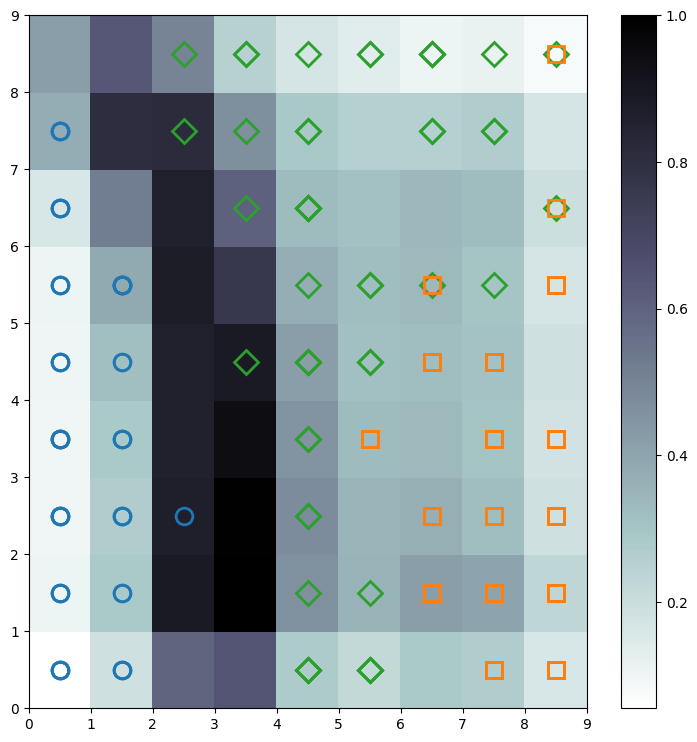

In [9]:
cl.mapSoms(som, labels, darr, n_neurons, m_neurons)

In [10]:
cl.use_kmeans(somlist, labels)

(KMeans(n_clusters=3), 0.8171812080536913, 3)

In [11]:
cl.use_kmeans(somlist, kmeans.labels_)

(KMeans(n_clusters=3), 0.8653243847874721, 3)

In [12]:
cl.use_kmeans(darr, labels)

(KMeans(n_clusters=3), 0.8797315436241611, 3)

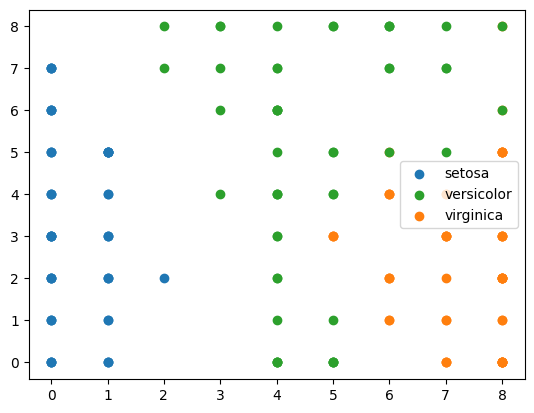

In [13]:
cl.plotKMeans(somlist, labels, labels)